In [30]:
## CS PMOS Amp Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
param_master = pd.read_csv("cs_amp_pmos_master.csv")

In [32]:
kgm_p = np.abs(param_master['kgmp Y'])
kcsg_p = np.abs(param_master['kcsg_p Y'])
kcgd_p = np.abs(param_master['kcdg_p Y'])
kgds_p = np.abs(param_master['kgds_p Y'])
ids = np.abs(param_master['kgmp X']) 

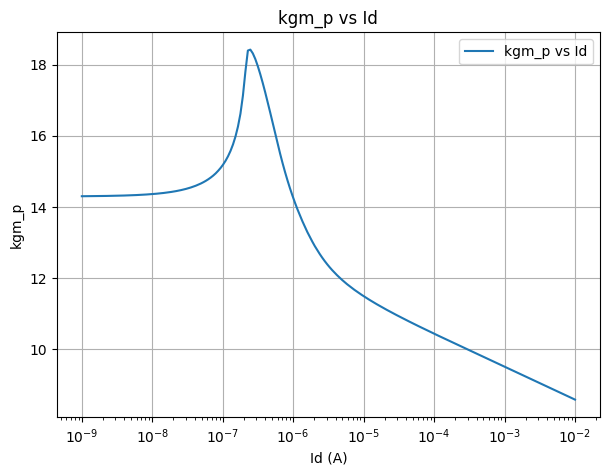

In [33]:
## Kgm vs Id curves for verification
plt.figure(figsize=(7,5))
plt.plot(ids, kgm_p, label='kgm_p vs Id')
plt.xscale('log')
plt.xlabel('Id (A)')
plt.ylabel('kgm_p')
plt.title('kgm_p vs Id')
plt.grid(True)
plt.legend()
plt.show()

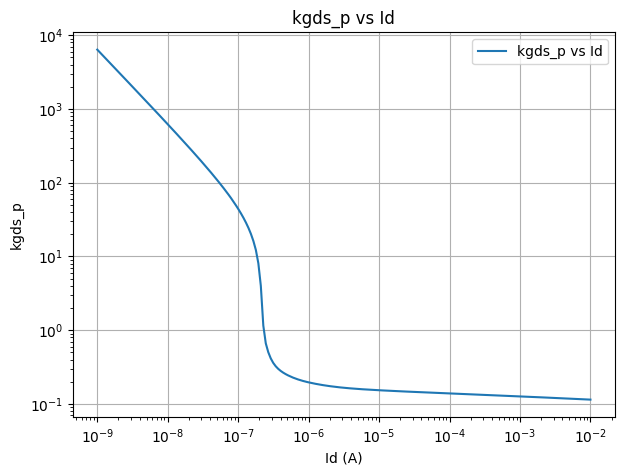

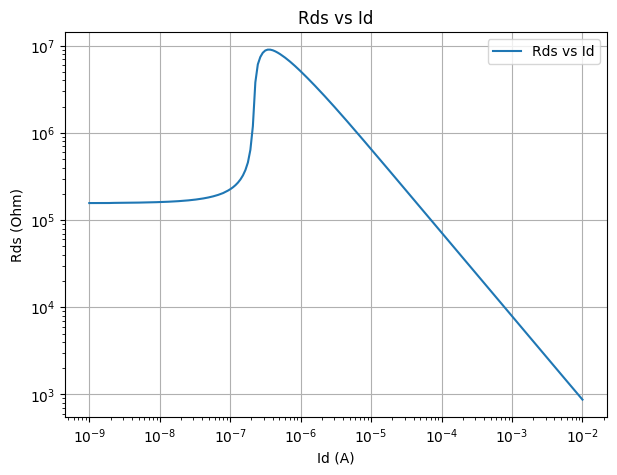

In [34]:
plt.figure(figsize=(7,5))
plt.plot(ids, kgds_p, label='kgds_p vs Id')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Id (A)')
plt.ylabel('kgds_p')
plt.title('kgds_p vs Id')
plt.grid(True)
plt.legend()
plt.show()

Rds = 1/(ids*kgds_p)
plt.figure(figsize=(7,5))
plt.plot(ids, Rds, label='Rds vs Id')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Id (A)')
plt.ylabel('Rds (Ohm)')
plt.title('Rds vs Id')
plt.grid(True)
plt.legend()
plt.show()

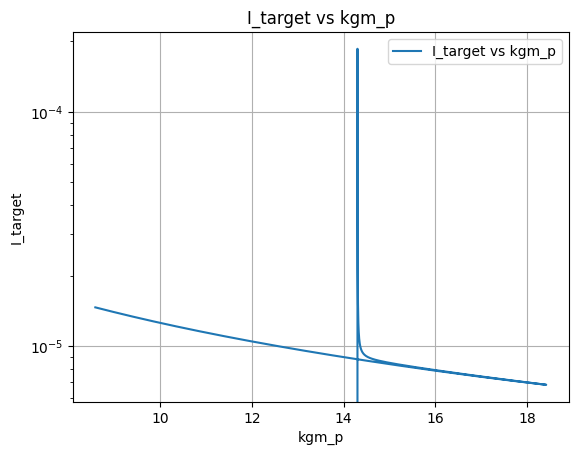

At kgm_p = 18 S, I = 7.012440343632404 uA
At kgm_p = 18 S, M_scale = 22.303951271637892


In [35]:
## Defining specs

Av_target = 10
f_bw = 2e6
GBW_target = Av_target * f_bw
C_L = 1e-12 # Starting value, but this will change later based on LDO PMOS sizing

I_target = 2*np.pi*GBW_target*C_L/(kgm_p - (2*np.pi*GBW_target*(kcgd_p)))

plt.plot(kgm_p, I_target, label='I_target vs kgm_p')
plt.yscale('log')
plt.xlabel('kgm_p')
plt.ylabel('I_target')
plt.title('I_target vs kgm_p')
plt.grid(True)
plt.legend()
plt.show()

kgm_p_target = 18
I_target_index = (np.abs(kgm_p - kgm_p_target)).idxmin()
I_1 = I_target[I_target_index]
ids_ref = ids[I_target_index]
M_scale = I_1/ids_ref
print(f"At kgm_p = {kgm_p_target} S, I = {I_target[I_target_index]*1e6} uA")
print(f"At kgm_p = {kgm_p_target} S, M_scale = {M_scale}")

In [36]:
kgds_eff = (np.abs(kgds_p))

# R_eff = 1/(ids*kgds_eff)

# plt.figure(figsize=(7,5))
# plt.plot(ids, R_eff, label='R_eff vs Id')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Id (A)')
# plt.ylabel('R_eff (Ohm)')
# plt.title('R_eff vs Id')
# plt.grid(True)
# plt.legend()
# plt.show()

# Find the index where ids is closest to I_1
# idx_closest = (np.abs(ids - I_1)).idxmin()
# R_eff_at_I1 = R_eff[idx_closest]

R_eff_at_I1 = 1/(I_1*kgds_eff[I_target_index])
print(f"R_eff at I_1 = {I_1:.6e} A is {R_eff_at_I1:.2e} Ohm")

gmp_target = kgm_p_target * I_1
Av_target_check = gmp_target * R_eff_at_I1
print(f"At I_1 = {I_1*1e6:.2f} uA, gmp = {gmp_target*1e3:.2f} mS, Av = {Av_target_check:.2f}")



R_eff at I_1 = 7.012440e-06 A is 3.96e+05 Ohm
At I_1 = 7.01 uA, gmp = 0.13 mS, Av = 49.93
